In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
os.chdir("/content/drive/My Drive/3 - 5A/PROJET INGENIEUR/PINN_PDE/")

# !pip install deepxde

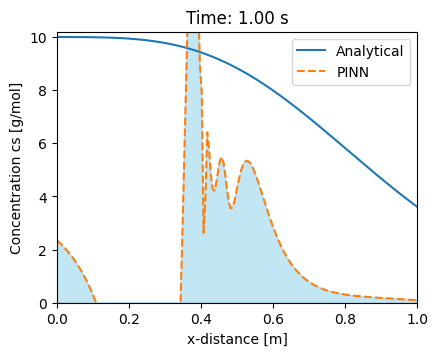

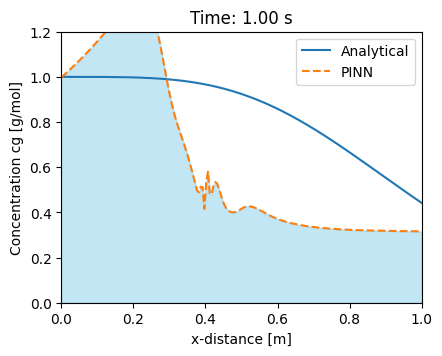

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from io import BytesIO

datetime_ = "2024_1_15_12_4_37"
iterations = 10

#Création du répertoire
os.mkdir(f"Run_{datetime_}_it{iterations}")

cs = np.load(f'1stStageAdamOptimized_cs.npy')
cg = np.load(f'1stStageAdamOptimized_cg.npy')

cs_analytical = pd.read_csv('cs_analytical.csv', header=None)
cg_analytical = pd.read_csv('cg_analytical.csv', header=None)

# Convert DataFrame to arrays
cs_analytical = cs_analytical.values
cg_analytical = cg_analytical.values

x_start = 0
x_end = 1
time_start = 0
time_end = 1

total_points = 200
num_time_steps = 100

dt = time_end / num_time_steps
x = np.linspace(x_start, x_end, total_points)
t = np.linspace(time_start, time_end, num_time_steps)
X, T = np.meshgrid(x,t)
input = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))


### Post Processing
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4.64, 3.52))

# Create a list to store the generated frames
frames = []

# Loop through each timestep
for timestep in range(cs.shape[1]):
    # Clear the axis
    ax.clear()

    # Plot the water depth at the current timestep

    ax.plot(x, cs_analytical[:, timestep], label='Analytical')
    ax.plot(x, cs[:, timestep], linestyle='--', label='PINN')

    # Fill the area between the curves
    ax.fill_between(x, 0, cs[:, timestep], color='skyblue', alpha=0.5)
   # ax.fill_between(x, 0, h_values_transpose[:, timestep], color='lightgreen', alpha=0.5)

    timestamp = (timestep+1) * dt
    # Set the axis labels and title
    ax.set_xlabel('x-distance [m]')
    ax.set_ylabel('Concentration cs [g/mol]')
    ax.set_title(f'Time: {timestamp:.2f} s')
    ax.set_xlim([x_start, x_end])
    ax.set_ylim([0, 10.2])
    ax.legend()  # Add legend

    # Create an in-memory file object
    img_buffer = BytesIO()

    # Save the current figure to the in-memory file object
    plt.savefig(img_buffer, format='png')

    # Read the contents of the in-memory file object and add it to the list of frames
    img_buffer.seek(0)
    img_data = img_buffer.getvalue()
    img = imageio.imread(img_data, format='PNG')
    frames.append(img)

    # Clear the in-memory file object for the next iteration
    img_buffer.close()

# Save the list of frames as an MP4 file
# (adjust the file name and parameters as needed)
mp4_filename = f'Run_{datetime_}_it{iterations}/cs_animation.mp4'
imageio.mimsave(mp4_filename, frames, fps=10)

# Show the final animation
plt.show()


#Plot for velocity

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4.64, 3.52))

# Create a list to store the generated frames
frames = []

# Loop through each timestep
for timestep in range(cg.shape[1]):
    # Clear the axis
    ax.clear()

    # Plot the water depth at the current timestep

    ax.plot(x, cg_analytical[:, timestep], label='Analytical')
    ax.plot(x, cg[:, timestep], linestyle='--', label='PINN')

    # Fill the area between the curves
    ax.fill_between(x, 0, cg[:, timestep], color='skyblue', alpha=0.5)

    timestamp = (timestep+1) * dt
    # Set the axis labels and title
    ax.set_xlabel('x-distance [m]')
    ax.set_ylabel('Concentration cg [g/mol]')
    ax.set_title(f'Time: {timestamp:.2f} s')
    ax.set_xlim([x_start, x_end])
    #ax.set_ylim([0.8*np.min(u_analytical), 1.2*np.max(u_analytical)])
    ax.set_ylim([0, 1.2])
    ax.legend()  # Add legend

    # Create an in-memory file object
    img_buffer = BytesIO()

    # Save the current figure to the in-memory file object
    plt.savefig(img_buffer, format='png')

    # Read the contents of the in-memory file object and add it to the list of frames
    img_buffer.seek(0)
    img_data = img_buffer.getvalue()
    img = imageio.imread(img_data, format='PNG')
    frames.append(img)

    # Clear the in-memory file object for the next iteration
    img_buffer.close()

# Save the list of frames as an MP4 file
# (adjust the file name and parameters as needed)
mp4_filename = f'Run_{datetime_}_it{iterations}/cg_animation.mp4'
imageio.mimsave(mp4_filename, frames, fps=10)

# Show the final animation
plt.show()